In [20]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sys
sys.path.insert(0, '/content/drive/MyDrive/Telecommunication-Industry-Analysis')


In [ ]:
# import clean_dataframe as cleanData

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
all_data = pd.read_excel("/content/drive/MyDrive/Telecommunication-Industry-Analysis/teleco_excel_file.xlsx")

# all_data.head()
# pd.set_option('display.max_columns', 50)

In [ ]:
# all_data.columns.tolist()

In [4]:
print(f" There are {all_data.shape[0]} rows and {all_data.shape[1]} columns")

 There are 150001 rows and 55 columns


##### Dealing with missing values

In [23]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telco dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(all_data)

The telco dataset contains 12.5 % missing values.


In [24]:
all_data.isna().sum() / all_data.shape[0] * 100

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

#### showing the missing columns

In [ ]:
# Now which column(s) has missing values
# all_data.isna().sum()

In [171]:
fd = pd.DataFrame(all_data)


In [ ]:
# cleanData(fd)

In [172]:
df = fd.drop(['IMSI', 'IMEI', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [ ]:
df.iloc[:5 , 0:10]

In [170]:
def repalce_missing_values(df):
  df["Bearer Id"] = df["Bearer Id"].fillna(df["Bearer Id"].mode()[0])
  df["Start"] = df["Start"].fillna(method='ffill')
  df["Start ms"] = df["Start ms"].fillna(method='ffill')
  df["End"] = df["End"].fillna(method='ffill')
  df["End ms"] = df["End ms"].fillna(method='ffill')
  df["Dur. (ms)"] = df["Dur. (ms)"].fillna(method='ffill')
  df["TCP DL Retrans. Vol (Bytes)"] = df["TCP DL Retrans. Vol (Bytes)"].fillna(df["TCP DL Retrans. Vol (Bytes)"].mean())
  df["TCP UL Retrans. Vol (Bytes)"] = df["TCP UL Retrans. Vol (Bytes)"].fillna(df["TCP UL Retrans. Vol (Bytes)"].mean())
  df["Total UL (Bytes)"] = df["Total UL (Bytes)"].fillna(df["Total UL (Bytes)"].mode()[0])
  df["Total DL (Bytes)"] = df["Total UL (Bytes)"].fillna(df["Total DL (Bytes)"].mode()[0])
  df["Nb of sec with Vol DL < 6250B"] = df["Nb of sec with Vol DL < 6250B"].fillna(df["Nb of sec with Vol DL < 6250B"].mode()[0]) 
  df["Nb of sec with Vol UL < 1250B"] = df["Nb of sec with Vol UL < 1250B"].fillna(df["Nb of sec with Vol UL < 1250B"].mode()[0])
  df["MSISDN/Number"] = df["MSISDN/Number"].fillna(df["MSISDN/Number"].mode()[0])
  df["Avg RTT DL (ms)"] = df["Avg RTT DL (ms)"].fillna(df["Avg RTT DL (ms)"].mode()[0])
  df["Avg RTT UL (ms)"] = df["Avg RTT UL (ms)"].fillna(df["Avg RTT UL (ms)"].mode()[0])
  df["Avg Bearer TP DL (kbps)"] = df["Avg Bearer TP DL (kbps)"].fillna(df["Avg Bearer TP DL (kbps)"].mode()[0])
  df["Avg Bearer TP UL (kbps)"] = df["Avg Bearer TP UL (kbps)"].fillna(df["Avg Bearer TP UL (kbps)"].mode()[0])
  df["Activity Duration DL (ms)"] = df["Activity Duration DL (ms)"].fillna(df["Activity Duration DL (ms)"].mode()[0])
  df["Activity Duration UL (ms)"] = df["Activity Duration UL (ms)"].fillna(df["Activity Duration UL (ms)"].mode()[0])
  df["Dur. (ms).1"] = df["Dur. (ms).1"].fillna(df["Dur. (ms).1"].mode()[0])
  df["Handset Manufacturer"] = df["Handset Manufacturer"].fillna(value='undefined')
  df["Handset Type"] = df["Handset Type"].fillna(value='undefined')
  df["Last Location Name"] = df["Last Location Name"].fillna(value='undefined')
  
  df = df.fillna(value=0)
  return df
repalce_missing_values(df)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),MSISDN/Number,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),...,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL,fixed_Dur. (ms),fixed_Total UL (Bytes),fixed_Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,86399.0,3.366496e+10,9164566995485190,42.0,5.0,...,1.805588e+08,2.924265e+08,1.785519e+07,1.835594e+07,3.701304e+06,2.905912e+06,1.570185e+06,86399.0,36749741.0,36749741.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,86399.0,3.368185e+10,L77566A,65.0,5.0,...,5.419594e+08,6.099208e+08,3.556554e+07,3.935912e+07,9.373850e+05,4.414096e+06,1.933278e+06,86399.0,53800391.0,53800391.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,86399.0,3.376063e+10,D42335A,28.0,5.0,...,4.149084e+08,2.299803e+08,2.375120e+07,3.442524e+07,3.363124e+06,1.022912e+07,1.726277e+06,86399.0,27883638.0,27883638.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,86399.0,3.375034e+10,T21824A,28.0,5.0,...,7.618372e+08,8.103879e+08,1.509259e+07,3.653476e+07,2.070983e+06,1.181176e+07,6.574930e+05,86399.0,43324218.0,43324218.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,86399.0,3.369980e+10,D88865A,28.0,5.0,...,5.646198e+08,5.312370e+08,1.753980e+07,3.422225e+07,2.110349e+06,7.748843e+06,9.127880e+05,86399.0,38542814.0,38542814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,3.365069e+10,D20434A,32.0,0.0,...,1.675193e+07,5.358069e+08,3.756186e+07,2.795510e+07,6.908760e+05,1.278491e+07,3.517065e+06,81230.0,57628851.0,57628851.0
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,3.366345e+10,D10223C,27.0,2.0,...,7.146381e+08,6.316281e+08,4.064329e+07,2.216552e+07,2.121718e+06,4.415361e+06,2.352181e+06,97970.0,39135081.0,39135081.0
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,3.362189e+10,T51102A,43.0,6.0,...,1.324156e+08,5.669338e+08,1.502970e+07,2.451641e+07,2.058277e+06,6.585469e+06,1.260239e+06,98249.0,34912224.0,34912224.0
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,3.361962e+10,L88342B,37.0,5.0,...,8.161200e+08,3.550664e+08,1.649484e+07,1.712251e+07,2.850914e+06,7.757267e+06,8.231090e+05,97910.0,29626096.0,29626096.0


In [168]:
df = df.fillna(value=0)

In [36]:
# df.isna().sum()

In [ ]:
# df["Nb of sec with Vol DL < 6250B"].isna().sum()

In [169]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL,fixed_Dur. (ms),fixed_Total UL (Bytes),fixed_Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05
mean,1.015806e+19,499.189512,498.799735,85609.565556,4.182414e+10,94.620523,15.315031,13299.957414,1770.417111,2.080991e+07,...,4.293653e+08,4.303331e+08,2.262861e+07,2.264348e+07,2.259102e+06,7.807295e+06,1.828250e+06,85609.565556,3.999074e+07,3.999074e+07
std,2.893178e+18,288.611320,288.097034,40769.358825,2.438731e+12,560.245617,76.687998,23971.823147,4625.342240,1.172356e+08,...,2.432681e+08,2.440199e+08,9.260820e+06,9.246800e+06,1.071109e+06,3.516420e+06,1.035646e+06,40769.358825,9.986936e+06,9.986936e+06
min,6.917538e+18,0.000000,0.000000,7142.000000,3.360100e+10,0.000000,0.000000,0.000000,0.000000,2.000000e+00,...,1.490450e+05,3.063580e+05,9.843200e+04,7.890300e+04,8.359000e+03,4.033000e+04,1.563000e+03,7142.000000,2.866892e+06,2.866892e+06
25%,7.349883e+18,250.000000,251.000000,57442.000000,3.365094e+10,28.000000,3.000000,43.000000,47.000000,1.332932e+06,...,2.185534e+08,2.187279e+08,1.597946e+07,1.599846e+07,1.359344e+06,4.943599e+06,9.322180e+05,57442.000000,3.322196e+07,3.322196e+07
50%,7.349883e+18,499.000000,500.000000,86399.000000,3.366361e+10,38.000000,5.000000,63.000000,63.000000,2.080991e+07,...,4.299865e+08,4.316150e+08,2.263554e+07,2.266177e+07,2.263567e+06,7.812835e+06,1.826471e+06,86399.000000,4.114324e+07,4.114324e+07
75%,1.304243e+19,749.000000,750.000000,101468.000000,3.368307e+10,62.000000,11.000000,19710.000000,1120.000000,2.080991e+07,...,6.399275e+08,6.414159e+08,2.929044e+07,2.929260e+07,3.159818e+06,1.068280e+07,2.727487e+06,101468.000000,4.728190e+07,4.728190e+07
max,1.318654e+19,999.000000,999.000000,181414.000000,8.823971e+14,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,...,8.595209e+08,8.592028e+08,4.519815e+07,4.519008e+07,4.518036e+06,1.552878e+07,3.650861e+06,181414.000000,5.973914e+07,5.973914e+07


## Data Scaling 

### Standardization

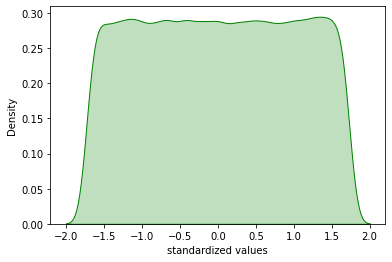

In [194]:
#define the columns 
 
cols = ['Bearer Id', 'Dur. (ms)', 'MSISDN/Number','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Social Media DL (Bytes)','Social Media UL (Bytes)',
        'Google DL (Bytes)','Google UL (Bytes)' , 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)' , 'Total DL (Bytes)']
 
#call the standard scaler 
std_scaler = StandardScaler()
 
#fit the values to the function 
Stand_Sc = std_scaler.fit_transform(df[cols].iloc[:,range(0,7)].values)
 
#use seaborn for KDE plot
sns.kdeplot(Stand_Sc[:,5],fill=True, color = 'Green')
 
#Label the plot 
plt.xlabel('standardized values')
 
#Print the plot 
plt.show()

### Normalization

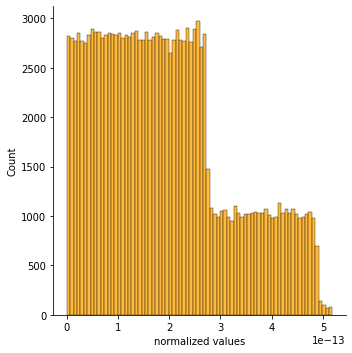

In [41]:
#initialize normalizer
data_norm = Normalizer()
 
#Fit the data
Normalize = data_norm.fit_transform(df[cols].iloc[:,range(0,7)].values)
 
#Distribution plot 
sns.displot(Normalize[:,5],fill=True, color = 'orange')
 
#Add the axis labels 
plt.xlabel('normalized values')
 
#Display the plot 
plt.show()

In [ ]:
# df[cols]["Bearer Id"]

## Extracting Data

### Handset type and manufacures

In [ ]:
ht = df["Handset Type"].value_counts()
ht.head(10)

In [ ]:
hm = df["Handset Manufacturer"].value_counts()
hm.head(3)

In [ ]:
Manu_grp = df.groupby(["Handset Manufacturer"])
Manu_grp.get_group('Apple').iloc[:1 , 20:40]

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Apple'].head(5)

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Samsung'].head(5)

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Huawei'].head(5)

### interpretation and recommendation to marketing teams
The data between Handset Manufacturer and Handset Type shows that most of the users from the sample data use the manufacturer Apple product


In [ ]:
df["MSISDN/Number"].value_counts()

In [ ]:
User_grp = df.groupby(["MSISDN/Number"])
# User_grp.get_group('3.362632e+10')

In [ ]:
User_grp['Bearer Id'].value_counts()

In [ ]:
User_grp['Bearer Id'].median()

In [ ]:
User_grp['Bearer Id'].mean()

In [ ]:
User_grp["MSISDN/Number"].agg(['median', 'mean'])

In [ ]:
User_grp['Dur. (ms)'].value_counts()

### number of xDR sessions and Session duration per user



In [ ]:
Userstot_grp = df.groupby(["MSISDN/Number"])

In [ ]:
Userstot_grp["Bearer Id"].value_counts().head()

MSISDN/Number  Bearer Id   
3.360100e+10   1.311448e+19    1
               7.349883e+18    1
               7.349883e+18    1
3.360101e+10   1.304243e+19    1
               7.277826e+18    1
Name: Bearer Id, dtype: int64

In [ ]:
Userstot_grp["Dur. (ms)"].value_counts().head()

MSISDN/Number  Dur. (ms)
3.360100e+10   116720.0     1
               181230.0     1
               134969.0     1
3.360101e+10   49878.0      1
               18549.0      1
Name: Dur. (ms), dtype: int64

The total data volume (in Bytes) during this session for each application

In [162]:
#creating new table for the applications 
applications= pd.DataFrame()
def apps(df):
  applications['user'] = df['MSISDN/Number']
  applications['Bearer Id'] = df['Bearer Id']
  applications['Dur. (ms)'] = df['Dur. (ms)']
  applications['Total_UL_and_DL'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
  applications['Other UL and DL'] = df['Other UL (Bytes)'] + df['Other DL (Bytes)']
  applications['Gaming UL and DL'] = df['Gaming UL (Bytes)'] + df['Gaming DL (Bytes)']
  applications['Netflix UL and DL'] = df['Netflix UL (Bytes)'] + df['Netflix DL (Bytes)']
  applications['Youtube UL and DL'] = df['Youtube UL (Bytes)'] + df['Youtube DL (Bytes)']
  applications['Email UL and DL'] = df['Email UL (Bytes)'] + df['Email DL (Bytes)']
  applications['Google UL and DL'] = df['Google UL (Bytes)'] + df['Google DL (Bytes)']
  applications['Social Media UL and DL'] = df['Social Media UL (Bytes)'] + df['Social Media DL (Bytes)']
  return applications.head()
apps(df)

,user,Bearer Id,Dur. (ms),Total_UL_and_DL,Other UL and DL,Gaming UL and DL,Netflix UL and DL,Youtube UL and DL,Email UL and DL,Google UL and DL,Social Media UL and DL
0,3.366496e+10,1.311448e+19,86399.0,73499482.0,180558843.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0
1,3.368185e+10,1.311448e+19,86399.0,107600782.0,541959383.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0
2,3.376063e+10,1.311448e+19,86399.0,55767276.0,414908351.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0
3,3.375034e+10,1.311448e+19,86399.0,86648436.0,761837216.0,810387875.0,15092588.0,36534765.0,2070983.0,11811761.0,657493.0
4,3.369980e+10,1.311448e+19,86399.0,77085628.0,564619822.0,531237049.0,17539799.0,34222253.0,2110349.0,7748843.0,912788.0


In [163]:
# changing the bytes to Megabytes
for x in applications:
  if(x != 'Bearer Id' and x != 'Dur. (ms)' and x != 'user'):
    applications[x]= applications[x]/(10**6)
    
applications.head(4)

,user,Bearer Id,Dur. (ms),Total_UL_and_DL,Other UL and DL,Gaming UL and DL,Netflix UL and DL,Youtube UL and DL,Email UL and DL,Google UL and DL,Social Media UL and DL
0,3.366496e+10,1.311448e+19,86399.0,73.499482,180.558843,292.426453,17.855187,18.355943,3.701304,2.905912,1.570185
1,3.368185e+10,1.311448e+19,86399.0,107.600782,541.959383,609.920783,35.565545,39.359124,0.937385,4.414096,1.933278
2,3.376063e+10,1.311448e+19,86399.0,55.767276,414.908351,229.980251,23.751202,34.425237,3.363124,10.229119,1.726277
3,3.375034e+10,1.311448e+19,86399.0,86.648436,761.837216,810.387875,15.092588,36.534765,2.070983,11.811761,0.657493


In [164]:
user_grp = applications.groupby(["user"])

In [165]:
user_agg= user_grp.agg({'Bearer Id':'sum','Dur. (ms)':'sum','Total_UL_and_DL':'sum','Other UL and DL':'sum','Gaming UL and DL':'sum','Netflix UL and DL':'sum','Youtube UL and DL':'sum','Email UL and DL':'sum','Google UL and DL':'sum','Social Media UL and DL':'sum'})
user_agg['Num_of_xDR_sessions']=user_agg['Bearer Id']
# user_agg.head(10)

## Data Exploration

In [166]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])    
    return df[column]

################ Plot Functions ########################
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()


def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col,showfliers = False)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()


def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


###Univariate Analysis

Graphical


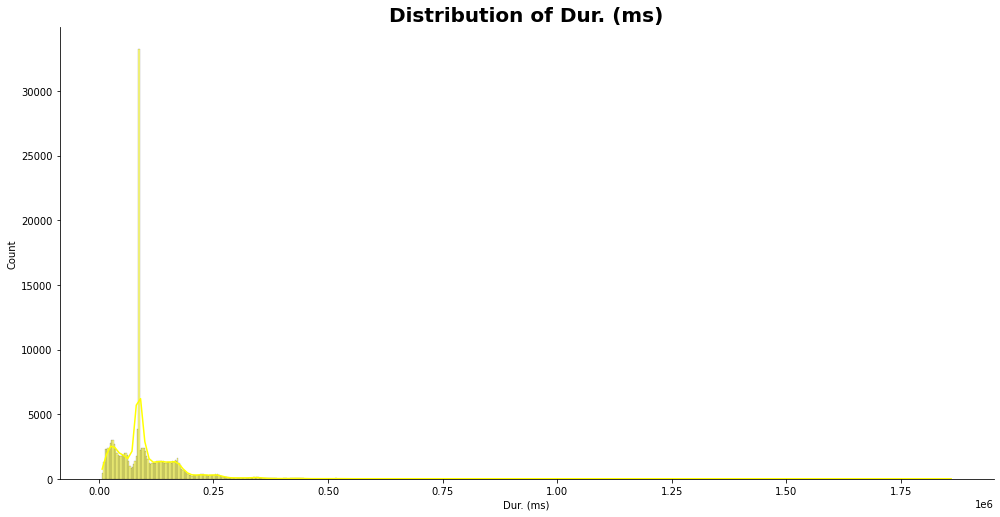

In [173]:
### with outliter
plot_hist(df, "Dur. (ms)", "yellow")

In [175]:
#### after outlier removed
applications['Dur. (ms)']=fix_outlier(applications,'Dur. (ms)')

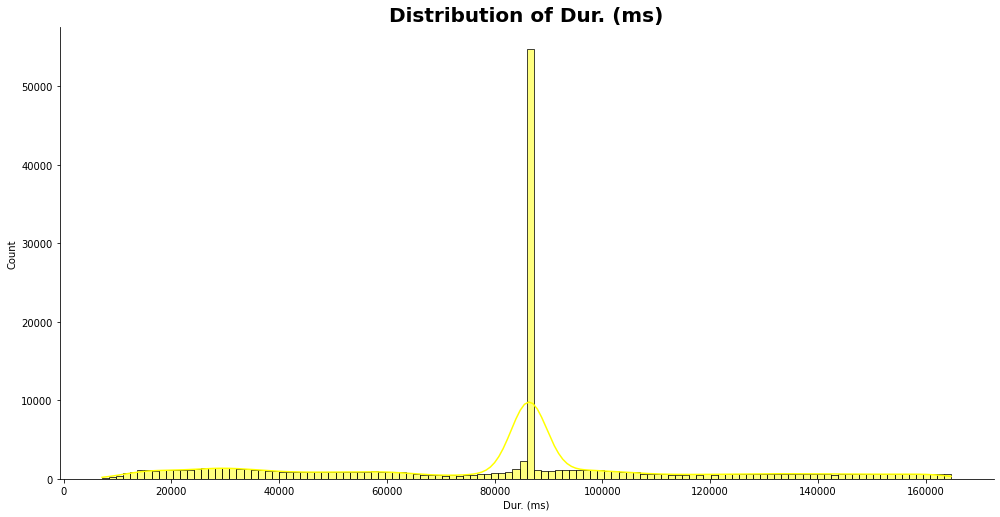

In [176]:
plot_hist(applications, "Dur. (ms)", "yellow")

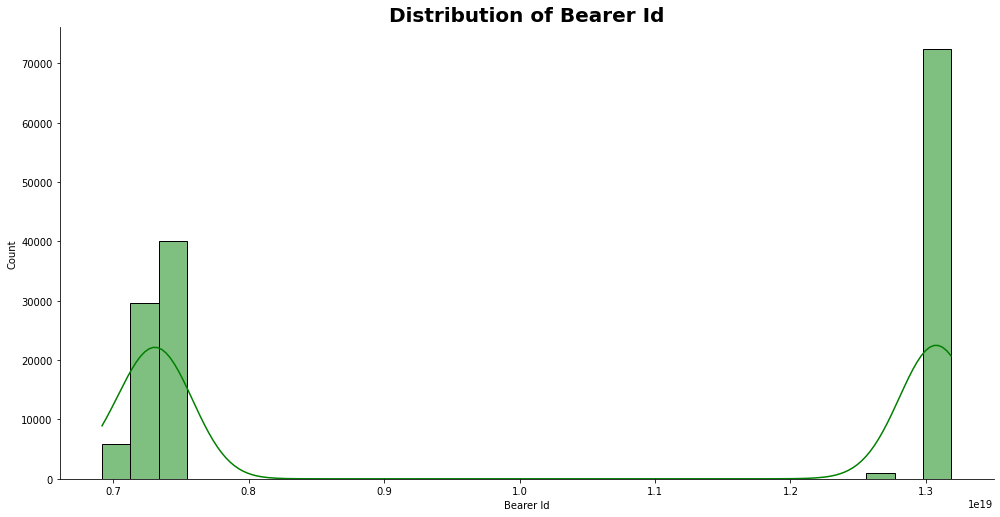

In [177]:
### No outliers
plot_hist(df, "Bearer Id", "green")

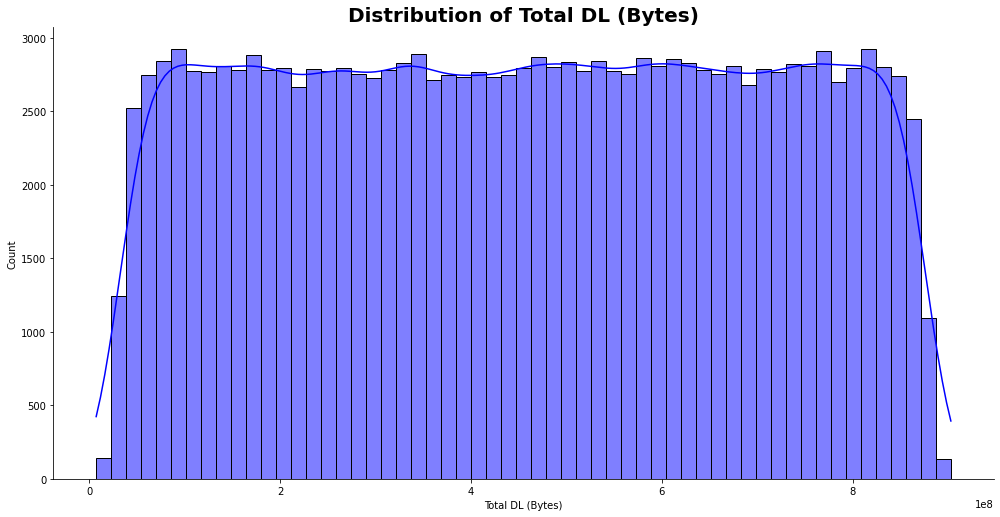

In [187]:
plot_hist(df, "Total DL (Bytes)", "blue")

In [190]:
##### outlies fixed
df['fixed_Total_UL_and_DL']=fix_outlier(df,'Total DL (Bytes)')

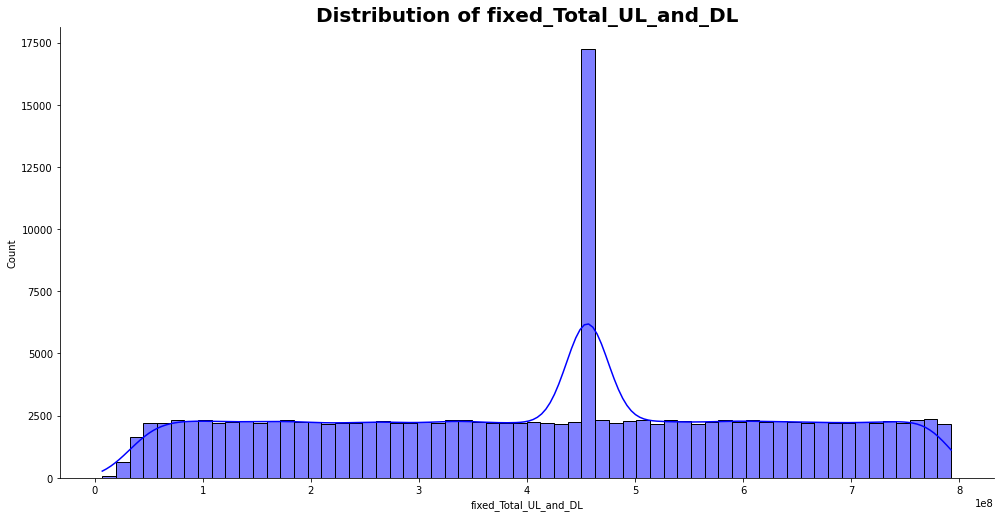

In [191]:
plot_hist(df, "fixed_Total_UL_and_DL", "blue")

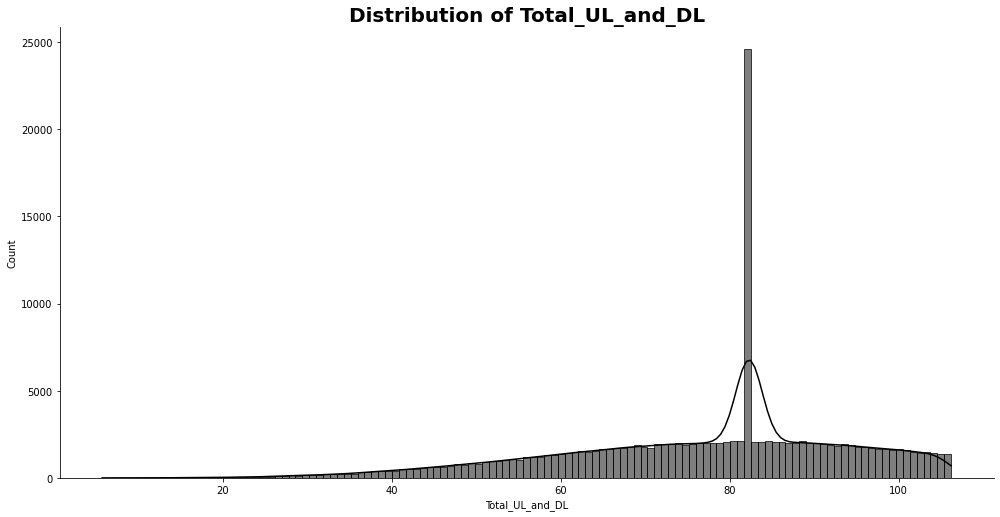

In [192]:
plot_hist(applications, "Total_UL_and_DL", "black")

Non-Graphical

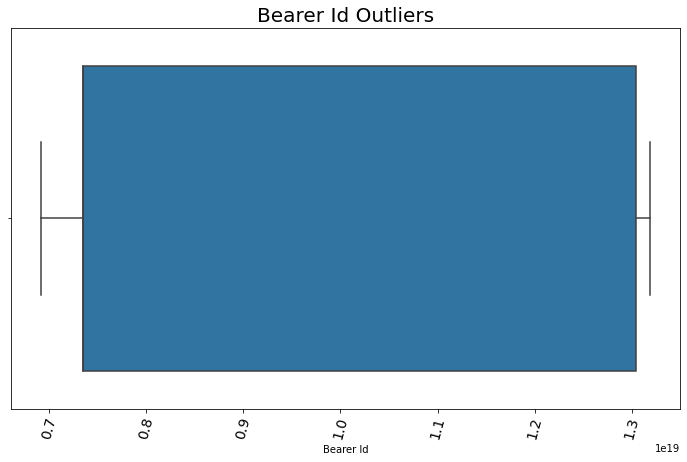

In [186]:
plot_box(df, "Bearer Id", 'Bearer Id Outliers')

In [152]:
df["fixed_Dur. (ms)"] = fix_outlier(df, "Dur. (ms)")

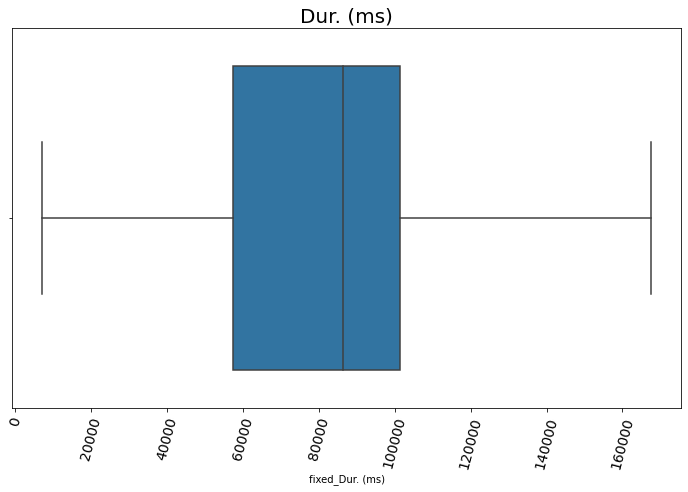

In [153]:
plot_box(df, "fixed_Dur. (ms)", 'Dur. (ms)')

In [150]:
df["fixed_Total DL (Bytes)"] = fix_outlier(df, "Total DL (Bytes)")

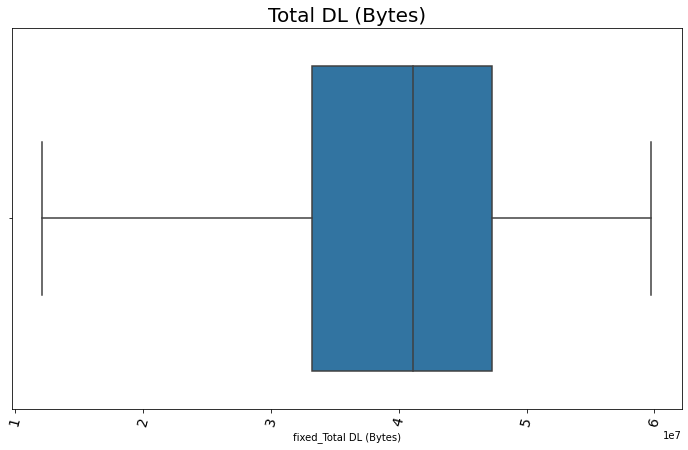

In [151]:
plot_box(df, "fixed_Total DL (Bytes)", 'Total DL (Bytes)')

In [148]:
df["fixed_Total UL (Bytes)"] = fix_outlier(df, "Total UL (Bytes)")

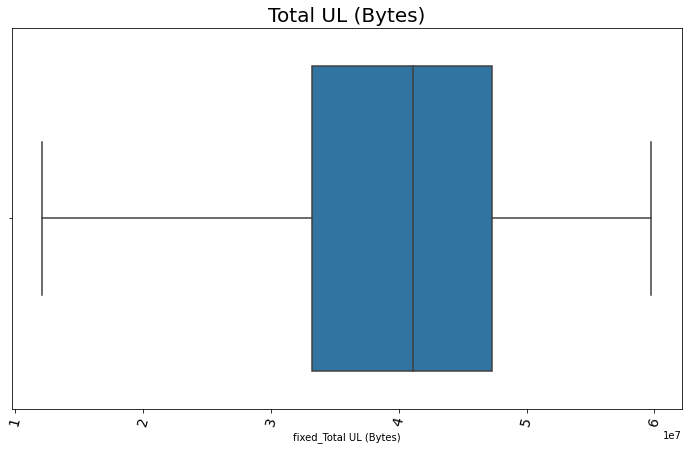

In [149]:
plot_box(df, "fixed_Total UL (Bytes)", 'Total UL (Bytes)')

categorical variables

In [ ]:
plot_count(applications, "Social Media UL and DL")

In [ ]:
plot_count(applications, "Email UL and DL")

In [ ]:
plot_count(applications, "Netflix UL and DL") 

In [ ]:
plot_count(applications, "Gaming UL and DL") 

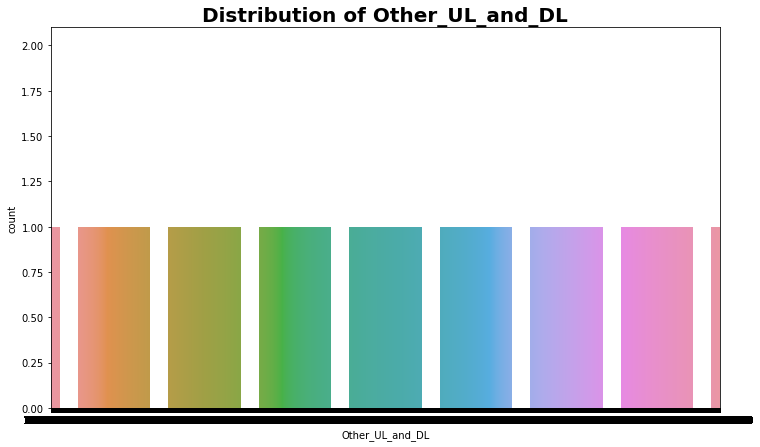

In [99]:
plot_count(applications, "Other UL and DL") 

In [ ]:
plot_count(applications, "Total_UL_and_DL") 

Multivariate Analysis


This analysis is done between total UL and DL and the other applications


Bivarate Analysis

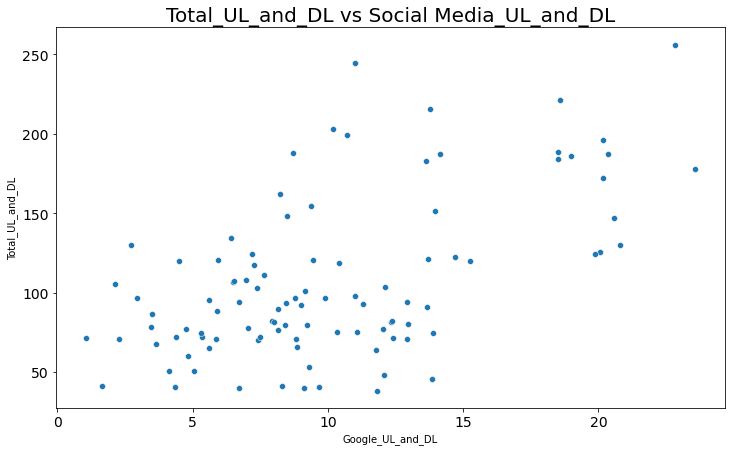

In [92]:
plot_scatter(user_agg.head(100), x_col="Social Media_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")

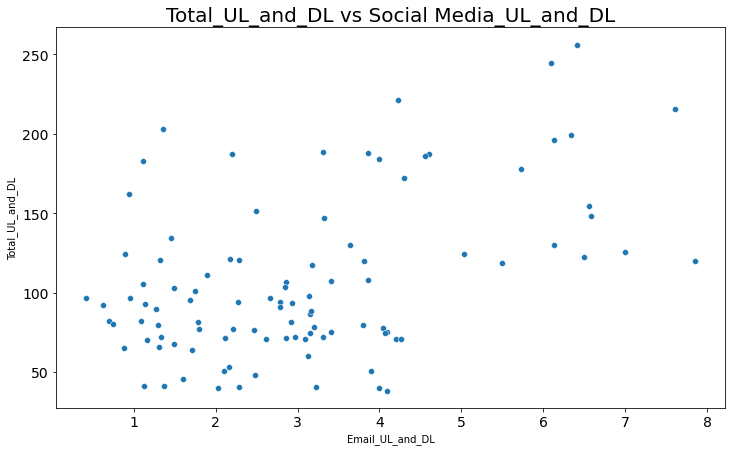

In [93]:
plot_scatter(user_agg.head(100), x_col="Google_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")

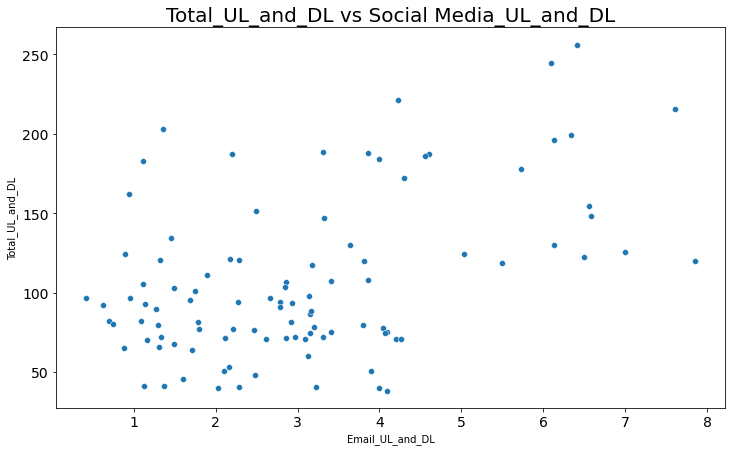

In [94]:
plot_scatter(user_agg.head(100), x_col="Email_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")

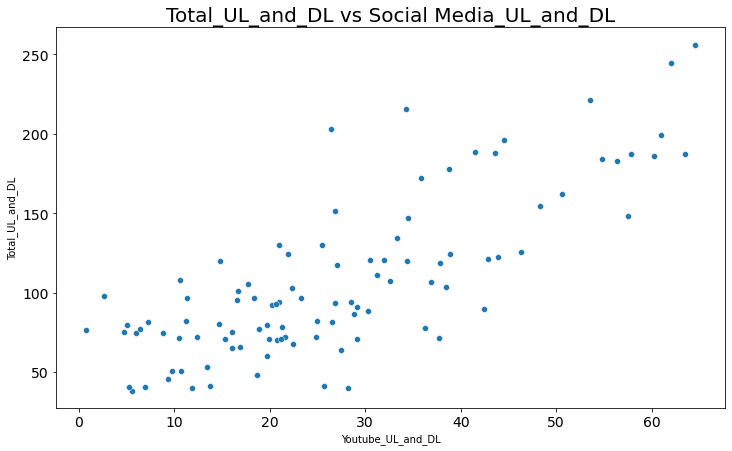

In [95]:
plot_scatter(user_agg.head(100), x_col="Youtube_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")

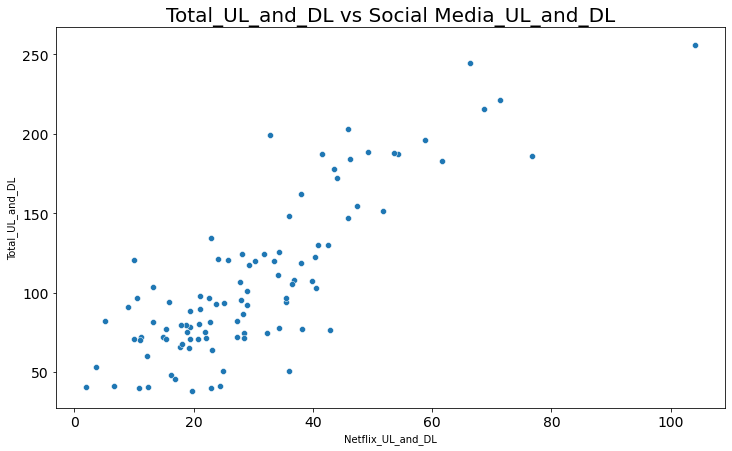

In [96]:
plot_scatter(user_agg.head(100), x_col="Netflix_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")

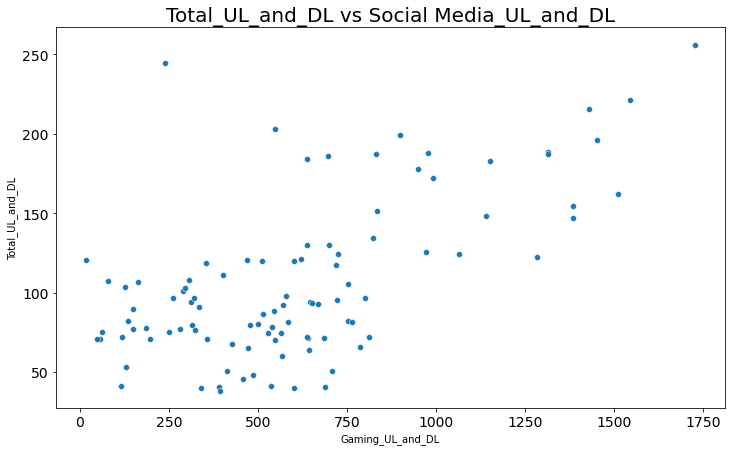

In [97]:
plot_scatter(user_agg.head(100), x_col="Gaming_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")

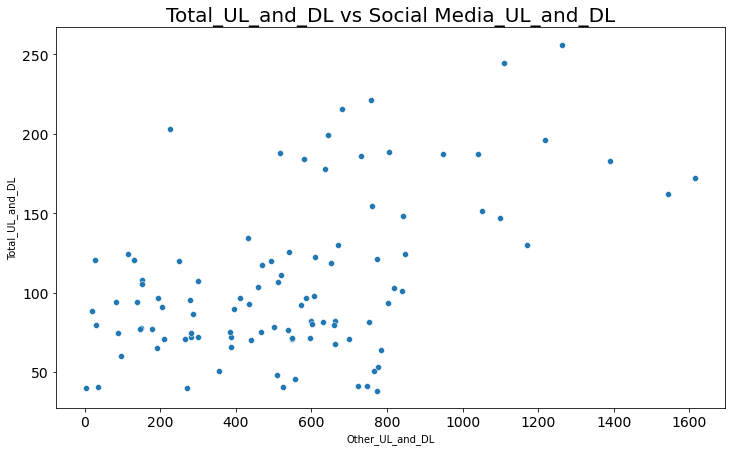

In [98]:
plot_scatter(user_agg.head(100), x_col="Other_UL_and_DL", y_col="Total_UL_and_DL", title="Total_UL_and_DL vs Social Media_UL_and_DL")